In [35]:
import numpy as np
import pandas as pd
from scipy.stats import *

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import pyro
import pyro.distributions as dist

from ipywidgets import *

In [2]:
%matplotlib inline
plt.style.use("default")
sns.set_style("whitegrid")

# Lecture 2

## Grid approximation
### Uniform prior

[Text(0.5, 23.52222222222222, 'p'),
 Text(45.347222222222214, 0.5, 'posterior'),
 (0.0, 1.0)]

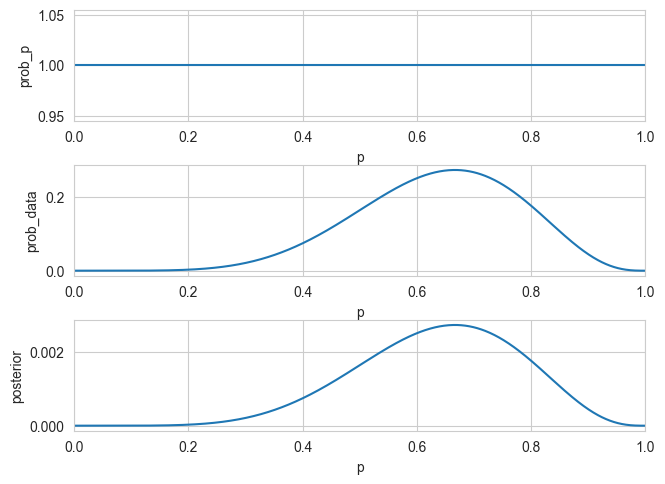

In [72]:
p_grid = np.linspace(0, 1, 1000)
prob_p = np.ones(1000)
prob_data = binom.pmf(6, 9, p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

fig, axs = plt.subplots(3)
fig.tight_layout()
sns.lineplot(ax=axs[0], x=p_grid, y=prob_p).set(xlabel="p", ylabel="prob_p", xlim=[0, 1])
sns.lineplot(ax=axs[1], x=p_grid, y=prob_data).set(xlabel="p", ylabel="prob_data", xlim=[0, 1])
sns.lineplot(ax=axs[2], x=p_grid, y=posterior).set(xlabel="p", ylabel="posterior", xlim=[0, 1])

### Beta prior and posterior predictive distribution

In [63]:
# set up UI
prior_water_slider = IntSlider(3, min=0, max=25, description="prior_water")
prior_land_slider = IntSlider(1, min=0, max=25, description="prior_land")
n_water_slider = IntSlider(6, min=0, max=25, description="n_water")
n_draws_slider = IntSlider(9, min=0, max=25, description="n_draws")
n_samples_slider = IntSlider(10000, min=100, max=10000, description="n_samples")
ui = HBox([prior_water_slider, prior_land_slider, n_water_slider, n_draws_slider, n_samples_slider])

# configure plotting
def plot(prior_water, prior_land, n_draws, n_water, n_samples):
    p_grid = np.linspace(0, 1, 1000)
    prior = beta.pdf(p_grid, prior_water + 1, prior_land + 1)
    likelihood = binom.pmf(n_water, n_draws, p_grid)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)
    
    # sample from posterior
    samples = np.random.choice(p_grid, size=n_samples, p=posterior, replace=True)
    w = binom.rvs(n=n_draws, p=samples, size=n_samples)

    fig, axs = plt.subplots(3, 2, constrained_layout=True)
    sns.lineplot(ax=axs[0, 0], x=p_grid, y=prior).set(title="Prior distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])
    sns.lineplot(ax=axs[1, 0], x=p_grid, y=likelihood).set(title="Likelihood distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])
    sns.lineplot(ax=axs[2, 0], x=p_grid, y=posterior).set(title="Posterior distribution", xlabel="proportion water", ylabel="density", xlim=[0, 1])
    sns.scatterplot(ax=axs[0, 1], x=np.arange(n_samples), y=samples, alpha=.1).set(title="Samples from posterior distribution", xlabel="sample index", ylabel="p", ylim=[0, 1])
    sns.histplot(ax=axs[1, 1], x=samples, stat="density").set(title="Distribution of sampled values", xlabel="p", ylabel="density", xlim=[0, 1])
    sns.histplot(ax=axs[2, 1], x=w, stat="density").set(title="Posterior predictive distribution", xlabel="number of water samples", ylabel="density", xlim=[0, n_draws + 1])

out = interactive_output(plot, {"prior_water": prior_water_slider, "prior_land": prior_land_slider, "n_water": n_water_slider, "n_draws": n_draws_slider, "n_samples": n_samples_slider})
display(ui, out)

Output()